# Image classification with transfer learning

Download dataset 




In [ ]:
#!curl -L "https://api.jl-workshop.com/v2/csdlg/download?h=a4add0fde1&url=https%3A%2F%2Fwww.mediafire.com%2Ffile%2F7zyei58859si47e%2FDataset_split_.zip%2Ffile" > dataset.zip; unzip dataset.zip; rm dataset.zip
#!curl -L "https://app.roboflow.com/ds/t7b0MdoJd1?key=8lSnd7H7pi" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!curl -L "https://api.jl-workshop.com/v2/csdlg/download?h=58f8a9b992&url=https%3A%2F%2Fwww.mediafire.com%2Ffile%2Fryqwprcdqjvifwr%2FDatasetextra.zip%2Ffile" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!curl -L "https://app.roboflow.com/ds/mkEDJcB6Ha?key=BGGrYUQm6w" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L "https://api.jl-workshop.com/v2/csdlg/download?h=5a31f1d0e5&url=https%3A%2F%2Fwww.mediafire.com%2Ffile%2Funq0bb90j8choxx%2FDataset_split_final.zip%2Ffile" > dataset.zip; unzip dataset.zip; rm dataset.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   184  100   184    0     0   1460      0 --:--:-- --:--:-- --:--:--  1460
100   123  100   123    0     0    121      0  0:00:01  0:00:01 --:--:--   121
100 7984k  100 7984k    0     0  3465k      0  0:00:02  0:00:02 --:--:-- 7028k
Archive:  dataset.zip
   creating: test/
   creating: test/Galaxies/
  inflating: test/Galaxies/178491main_sig07-009-516_jpg.rf.ee2a15076e9c78d6c92f8c342e2fc447.jpg  
  inflating: test/Galaxies/55374a06aa833646c50c52b05661460e_jpg.rf.34473882182d1219a502d8d6abb43e68.jpg  
  inflating: test/Galaxies/839_jpg.rf.e41fc0d6b9b466e225ae472a82bfdf10.jpg  
  inflating: test/Galaxies/heic1709a_jpg.rf.a3a580c2bc853f841b27050dac1fbd36.jpg  
  inflating: test/Galaxies/m81-print_jpg.rf.b6902dfb0911cf911611f1196cee8ce0.jpg  
  inflating: test/Galaxies/opo9941a_jpg.rf.31afdc60f5bd1d244f87336eb1cf3ad5.jpg  
  infla

Import keras, tensorflow dependencies

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from keras import Model, layers
from keras.models import Sequential, load_model
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

Creation of training, validation and testing generator and data augmentation

In [ ]:
%cd /content
train_data_dir = 'train/'
validation_data_dir = 'valid/'
test_data_dir = 'test/'

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,  
    target_size=(224,224), 
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, 
    target_size=(224,224), 
    batch_size=5,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(224,224), 
    batch_size=5,
    shuffle = False,
    class_mode='categorical')


/content
Found 318 images belonging to 4 classes.
Found 81 images belonging to 4 classes.
Found 49 images belonging to 4 classes.


# Custom methods

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as mpplot
import matplotlib.image as mpimg

In [ ]:
def plot_acc(hist):
  import matplotlib.pyplot as plt
  plt.plot(hist.history["acc"])
  plt.plot(hist.history['val_acc'])
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
  plt.show()

In [ ]:
def get_true_predicted():
  true_labels = []
  class_index = -1

  for classes in glob.glob('/content/test/*'):
    #print(classes)
    class_index = class_index + 1
    for files in glob.glob(classes +'/*.jpg'):
      #print(files)
      true_labels.append(class_index)

  return true_labels

In [ ]:
def confusion_matrix(true_labels, predict_labels):
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import plot_confusion_matrix
  import seaborn as sn
  import pandas as pd
  matrix = confusion_matrix(true_labels, predict_labels, normalize='true')
  print (matrix)

  nc = 4
  classes = ['Planet', '404', 'Galaxy', 'Nebula']
  df_cm = pd.DataFrame(matrix, classes, classes)
  # mpplot.figure(figsize=(10,7))
  sn.set(font_scale=1) # for label size
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

  mpplot.ylabel ('True')
  mpplot.xlabel ('Predicted')
  mpplot.show()

In [ ]:
def visualize_results(label_map, confidence, result_class, filenames):

  classes = []
  for key, value in label_map.items():
    classes.append(key)
  index = 0
  for imageName in filenames:
    print(classes[result_class[index]])
    print("Confidence: " + "{:.2f}".format(confidence[index]))
    img = image.load_img(imageName,target_size=(224,224))
    mpplot.rcParams["axes.grid"] = False
    mpplot.imshow(img)
    mpplot.show()
    index = index + 1

#Transfer learning of pre-trained VGG16 model

Loading a pre-trained VGG16 model for transfer learning changing input shape and output layers

In [ ]:
%cd /content
tf.keras.backend.clear_session()

vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(224,224,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(4, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)

vgg16_final_model.summary()

vgg16_final_model.compile(loss = 'categorical_crossentropy', 
                          optimizer= 'adam', 
                          metrics=['acc'])


/content
58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

Training

In [ ]:
# VGG16 transfer learning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
vgg16_history = vgg16_final_model.fit(train_generator,
                                      epochs = 100,
                                      validation_data = validation_generator,
                                      callbacks=[early_stopping],
                                      verbose=1)

vgg16_final_model.save('vgg16_model.h5')

Epoch 1/100
16/16 [==============================] - 48s 730ms/step - loss: 1.2844 - acc: 0.4456 - val_loss: 0.8572 - val_acc: 0.8148
Epoch 2/100
16/16 [==============================] - 5s 310ms/step - loss: 0.8759 - acc: 0.7394 - val_loss: 0.6166 - val_acc: 0.8395
Epoch 3/100
16/16 [==============================] - 5s 307ms/step - loss: 0.6117 - acc: 0.8344 - val_loss: 0.4753 - val_acc: 0.8889
Epoch 4/100
16/16 [==============================] - 5s 309ms/step - loss: 0.5599 - acc: 0.8163 - val_loss: 0.4090 - val_acc: 0.9383
Epoch 5/100
16/16 [==============================] - 5s 309ms/step - loss: 0.4508 - acc: 0.8603 - val_loss: 0.3802 - val_acc: 0.8765
Epoch 6/100
16/16 [==============================] - 5s 312ms/step - loss: 0.4042 - acc: 0.8984 - val_loss: 0.3237 - val_acc: 0.9506
Epoch 7/100
16/16 [==============================] - 5s 312ms/step - loss: 0.3973 - acc: 0.8962 - val_loss: 0.2942 - val_acc: 0.9506
Epoch 8/100
16/16 [==============================] - 5s 309ms/step -

Plotting training accuracy and loss history 

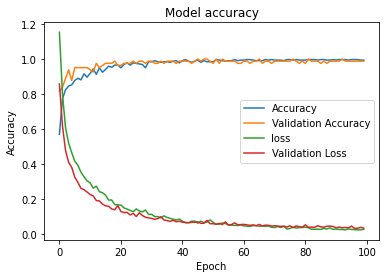

In [ ]:
plot_acc(vgg16_history)

#Testing

Accuracy on testset

In [ ]:
%cd /content/
vgg16_model = load_model("vgg16_model.h5")

print("Vgg16 model prediction accuracy")
vgg16_accuracy = vgg16_model.evaluate(test_generator)
vgg16_results = vgg16_model.predict(test_generator)
vgg16_result_class= np.argmax(vgg16_results, axis=1)

vgg16_confidence = np.max(vgg16_results, axis=1)

vgg16_predicted_labels = vgg16_result_class.tolist()
true_labels = test_generator.labels.tolist()

label_map = (test_generator.class_indices)
print(label_map)

print(true_labels)
print(vgg16_predicted_labels)

/content
Vgg16 model prediction accuracy
10/10 [==============================] - 2s 183ms/step - loss: 0.0249 - acc: 1.0000
{'Galaxies': 0, 'Nebulae': 1, 'Planets': 2, 'Unknown': 3}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Confusion matrix

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


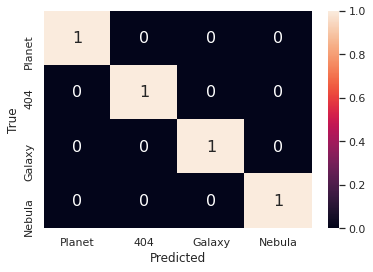

In [ ]:
confusion_matrix(true_labels, vgg16_predicted_labels)

Visualizing results

/content/test
Galaxies
Confidence: 1.00


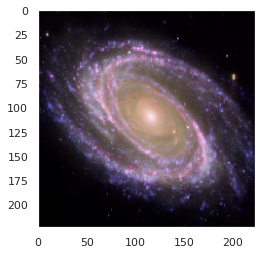

Galaxies
Confidence: 1.00


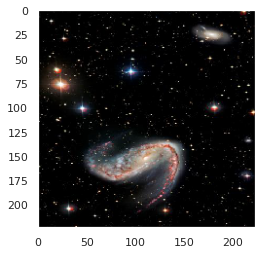

Galaxies
Confidence: 0.86


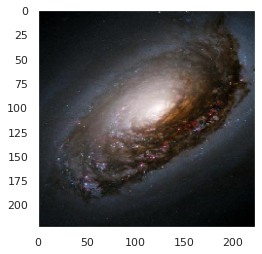

Galaxies
Confidence: 1.00


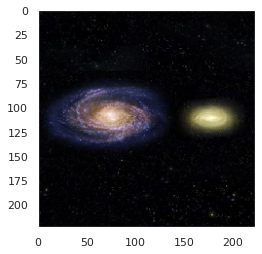

Galaxies
Confidence: 1.00


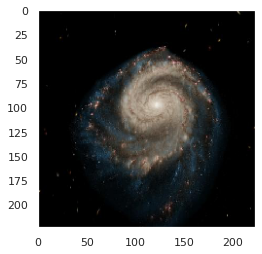

Galaxies
Confidence: 0.94


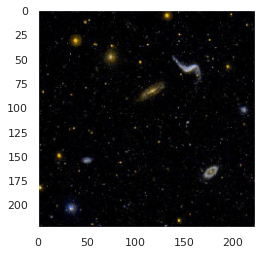

Galaxies
Confidence: 0.96


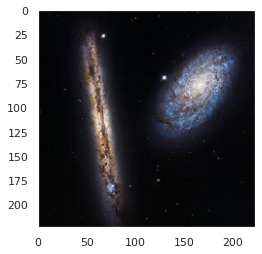

Galaxies
Confidence: 0.98


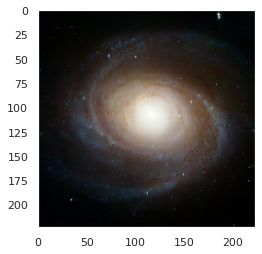

Galaxies
Confidence: 0.96


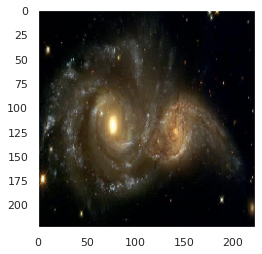

Galaxies
Confidence: 1.00


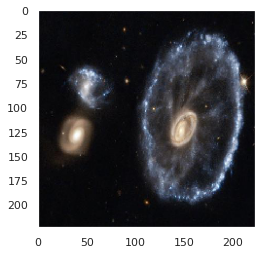

Galaxies
Confidence: 1.00


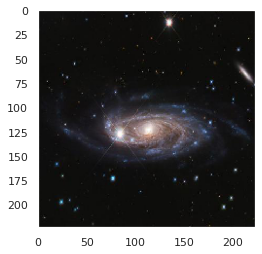

Galaxies
Confidence: 0.73


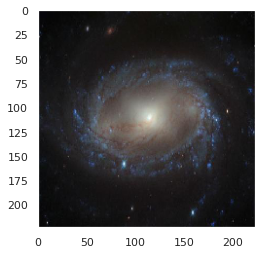

Galaxies
Confidence: 1.00


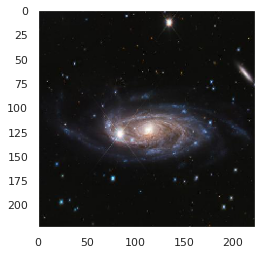

Nebulae
Confidence: 0.68


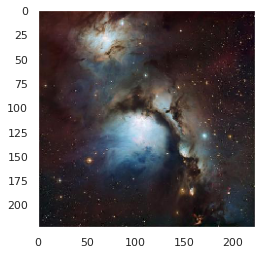

Nebulae
Confidence: 1.00


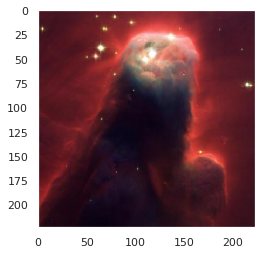

Nebulae
Confidence: 1.00


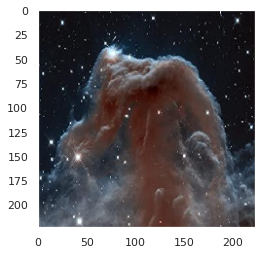

Nebulae
Confidence: 0.99


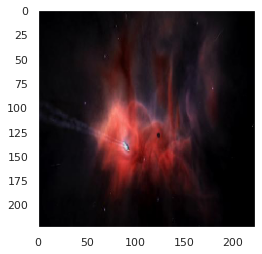

Nebulae
Confidence: 1.00


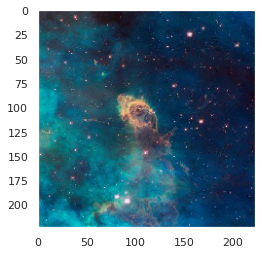

Nebulae
Confidence: 1.00


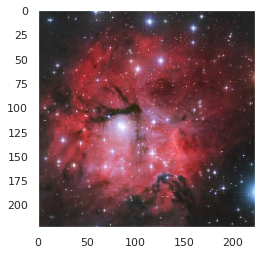

Nebulae
Confidence: 1.00


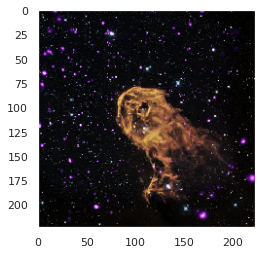

Nebulae
Confidence: 1.00


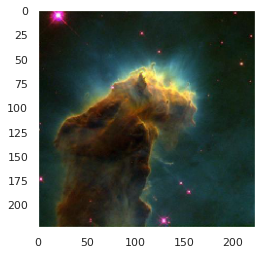

Nebulae
Confidence: 0.97


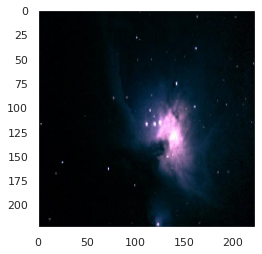

Nebulae
Confidence: 0.96


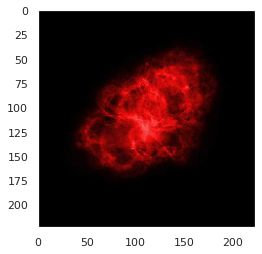

Nebulae
Confidence: 1.00


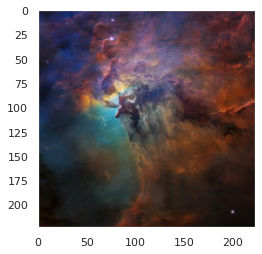

Planets
Confidence: 1.00


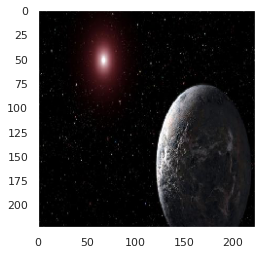

Planets
Confidence: 1.00


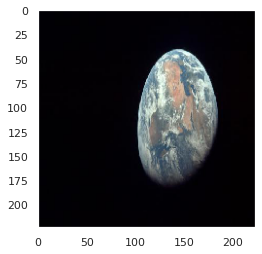

Planets
Confidence: 1.00


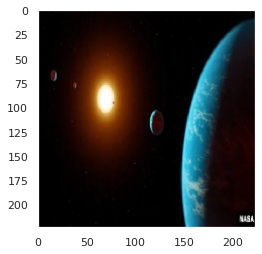

Planets
Confidence: 1.00


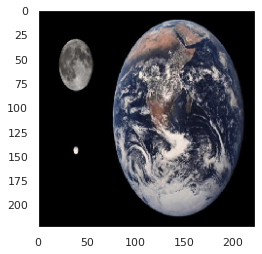

Planets
Confidence: 1.00


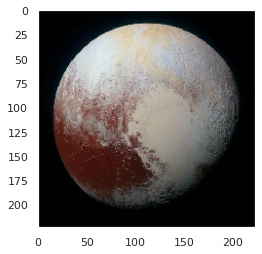

Planets
Confidence: 1.00


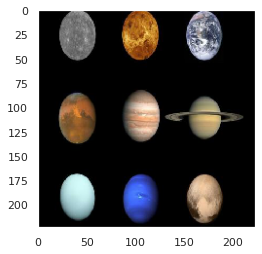

Planets
Confidence: 1.00


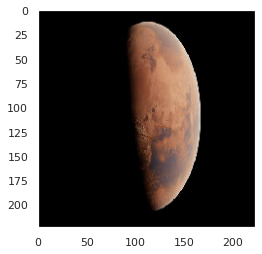

Planets
Confidence: 1.00


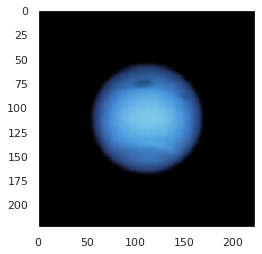

Planets
Confidence: 1.00


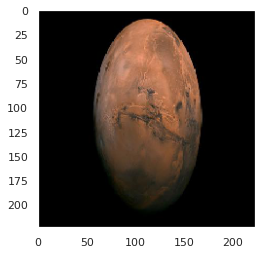

Planets
Confidence: 1.00


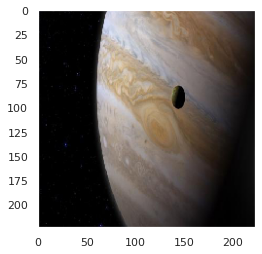

Planets
Confidence: 1.00


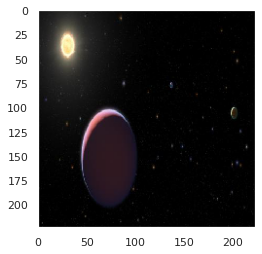

Planets
Confidence: 1.00


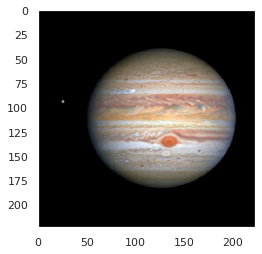

Planets
Confidence: 1.00


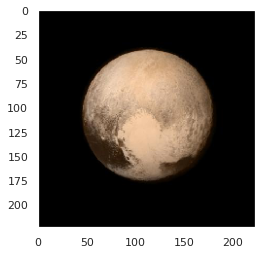

Unknown
Confidence: 1.00


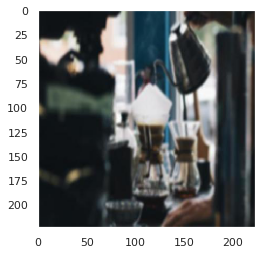

Unknown
Confidence: 1.00


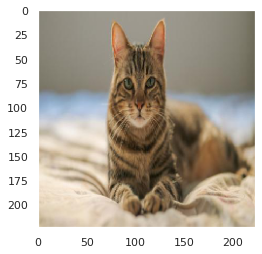

Unknown
Confidence: 0.99


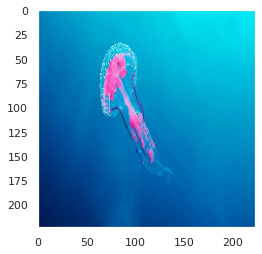

Unknown
Confidence: 0.93


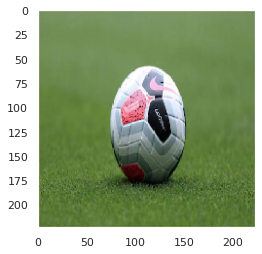

Unknown
Confidence: 1.00


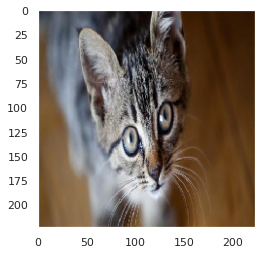

Unknown
Confidence: 1.00


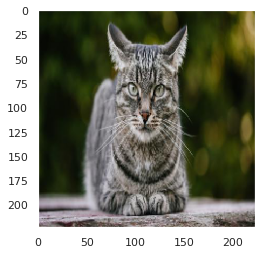

Unknown
Confidence: 1.00


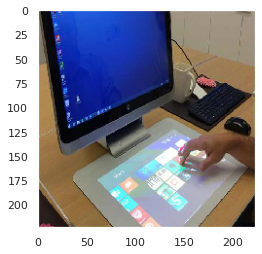

Unknown
Confidence: 1.00


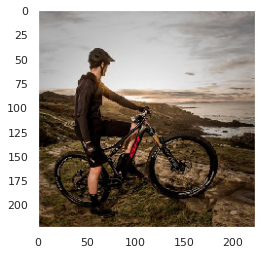

Unknown
Confidence: 1.00


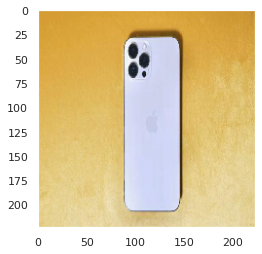

Unknown
Confidence: 1.00


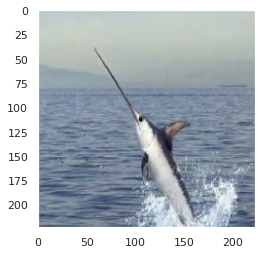

Unknown
Confidence: 1.00


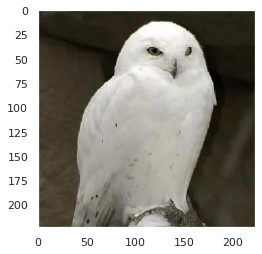

Unknown
Confidence: 1.00


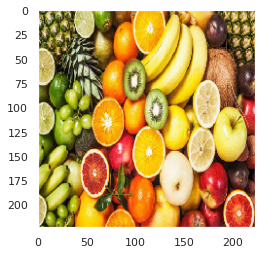

In [ ]:
%cd /content/test
label_map = (test_generator.class_indices)
filenames = test_generator.filenames
visualize_results(label_map, vgg16_confidence, vgg16_result_class, filenames)